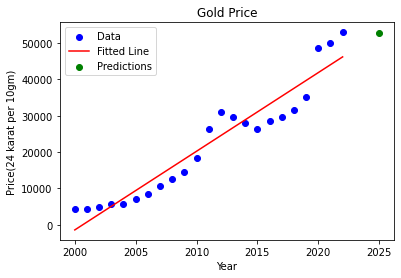

Slope: 2163.124505928853
Intercept: -4327659.337944663
Predictions for new X: [52667.78656126]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

def calculate_coefficients(x, y):
    n = len(x)
    x_mean = sum(x) / n if n > 0 else 0
    y_mean = sum(y) / n if n > 0 else 0
    numerator = 0
    denominator = 1e-10
    for i in range(n):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        denominator += (x[i] - x_mean) ** 2

    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    return slope, intercept

def calculate_errors(x, y, slope, intercept):
    y_pred = [slope * xi + intercept for xi in x]
    errors = [yi - y_pred[i] for i, yi in enumerate(y)]
    mse = sum([error ** 2 for error in errors]) / len(errors)
    rmse = mse ** 0.5
    return errors, mse, rmse

def predict_price(slope, intercept, year):
    return slope * year + intercept

data = pd.read_csv('./gold.csv')
x = data['Year'].values.reshape(-1, 1) 
y = data['Price']
years = list(data['Year'])
years_2d = [[year] for year in years]
model = LinearRegression()
model.fit(years_2d, y)

slope = model.coef_[0]
intercept = model.intercept_

new_X = np.array([2025]).reshape(-1, 1)
predictions = model.predict(new_X)

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='red', label='Fitted Line')
plt.scatter(new_X, predictions, color='green', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Price(24 karat per 10gm)')
plt.title('Gold Price')
plt.legend()
plt.show()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print("Predictions for new X:", predictions)

